In [1]:
%load_ext autoreload
%autoreload 2
%load_ext snakeviz

import sys

sys.path.insert(1, "../")

import RIS_gravity_inversion.inversion as inv
import RIS_gravity_inversion.plotting as plots
import RIS_gravity_inversion.utils as inv_utils
import RIS_gravity_inversion.synthetic as synth 

from antarctic_plots import utils, regions, maps, fetch, profile
import numpy as np
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import verde as vd
import pygmt

import pyogrio


# Antarctic Ice Shelf bathymetry contraint density
Here we analyze the major Antarctic ice shelves and calculate the spatial density of direct measurements of bathymetry depths. These measurements are restricted to drill holes with direct observations of water depth, and seismic survey's with accurate bed returns.  

## Ice shelf masks
Here we gather regional masks for some of the major Antarctic ice shelves. We will use bedmachine 

In [2]:
# fetch MEaSURES iceshelf shapefiles
measures_shelves = fetch.measures_boundaries(version="IceShelf")

# read into a geodataframe
ice_shelves = pyogrio.read_dataframe(measures_shelves)

# calculate area of each ice shelf
ice_shelves['area']=ice_shelves.area

# sort by area
ice_shelves.sort_values(by='area', ascending=False, inplace=True)

# merge ice shelves which have been split
ronne_filchner = ice_shelves[ice_shelves.NAME.isin(["Ronne", "Filchner"])].dissolve()
ronne_filchner.NAME="Ronne_Filchner"

RIS = ice_shelves[ice_shelves.NAME.isin(["Ross_West", "Ross_East"])].dissolve()
RIS.NAME="Ross_Ice_Shelf"

# add joined ice shelves back to dataframe
ice_shelves=ice_shelves.append([RIS, ronne_filchner])

# remove half ice shelves
ice_shelves.drop(
    labels=ice_shelves[ice_shelves.NAME.isin([
        'Ronne', 
        'Filchner',
        'Ross_East',
        'Ross_West',
        ])].index,
        inplace=True,
    )

# sort by area again
ice_shelves.sort_values(by='area', ascending=False, inplace=True)

ice_shelves

,NAME,Regions,TYPE,geometry,area
0,Ronne_Filchner,West,FL,"POLYGON ((-1006734.891 880592.980, -1006335.92...",3.274071e+11
0,Ross_Ice_Shelf,West,FL,"POLYGON ((-240677.184 -678259.006, -240038.274...",2.935519e+11
114,Amery,East,FL,"POLYGON ((2134701.422 618463.117, 2131452.011 ...",6.079728e+10
7,LarsenC,Peninsula,FL,"POLYGON ((-2235724.269 1271352.188, -2235828.5...",4.744351e+10
36,Riiser-Larsen,East,FL,"POLYGON ((-592166.317 1592824.258, -593783.160...",4.291314e+10
...,...,...,...,...,...
132,Arneb,East,FL,"POLYGON ((333867.825 -1897953.452, 333673.461 ...",6.408391e+06
129,Falkner,East,FL,"POLYGON ((425350.532 -1726631.609, 423726.753 ...",5.688547e+06
164,Hamilton_Piedmont,Islands,FL,"POLYGON ((-1589132.027 -582392.525, -1589188.1...",5.601416e+06
180,Rydberg_Peninsula_2,Peninsula,FL,"POLYGON ((-1795805.815 347774.271, -1795801.94...",3.109665e+06


<AxesSubplot: >

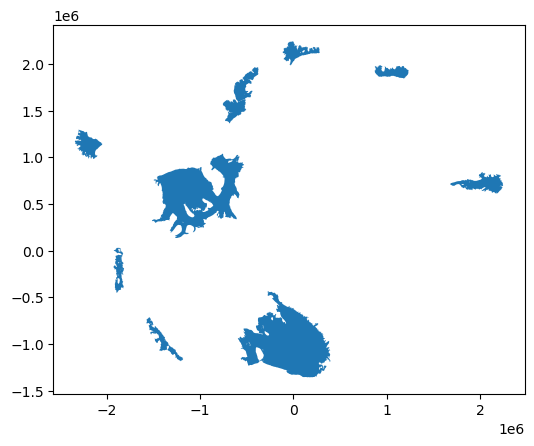

In [3]:
ice_shelves.iloc[0:10].plot()

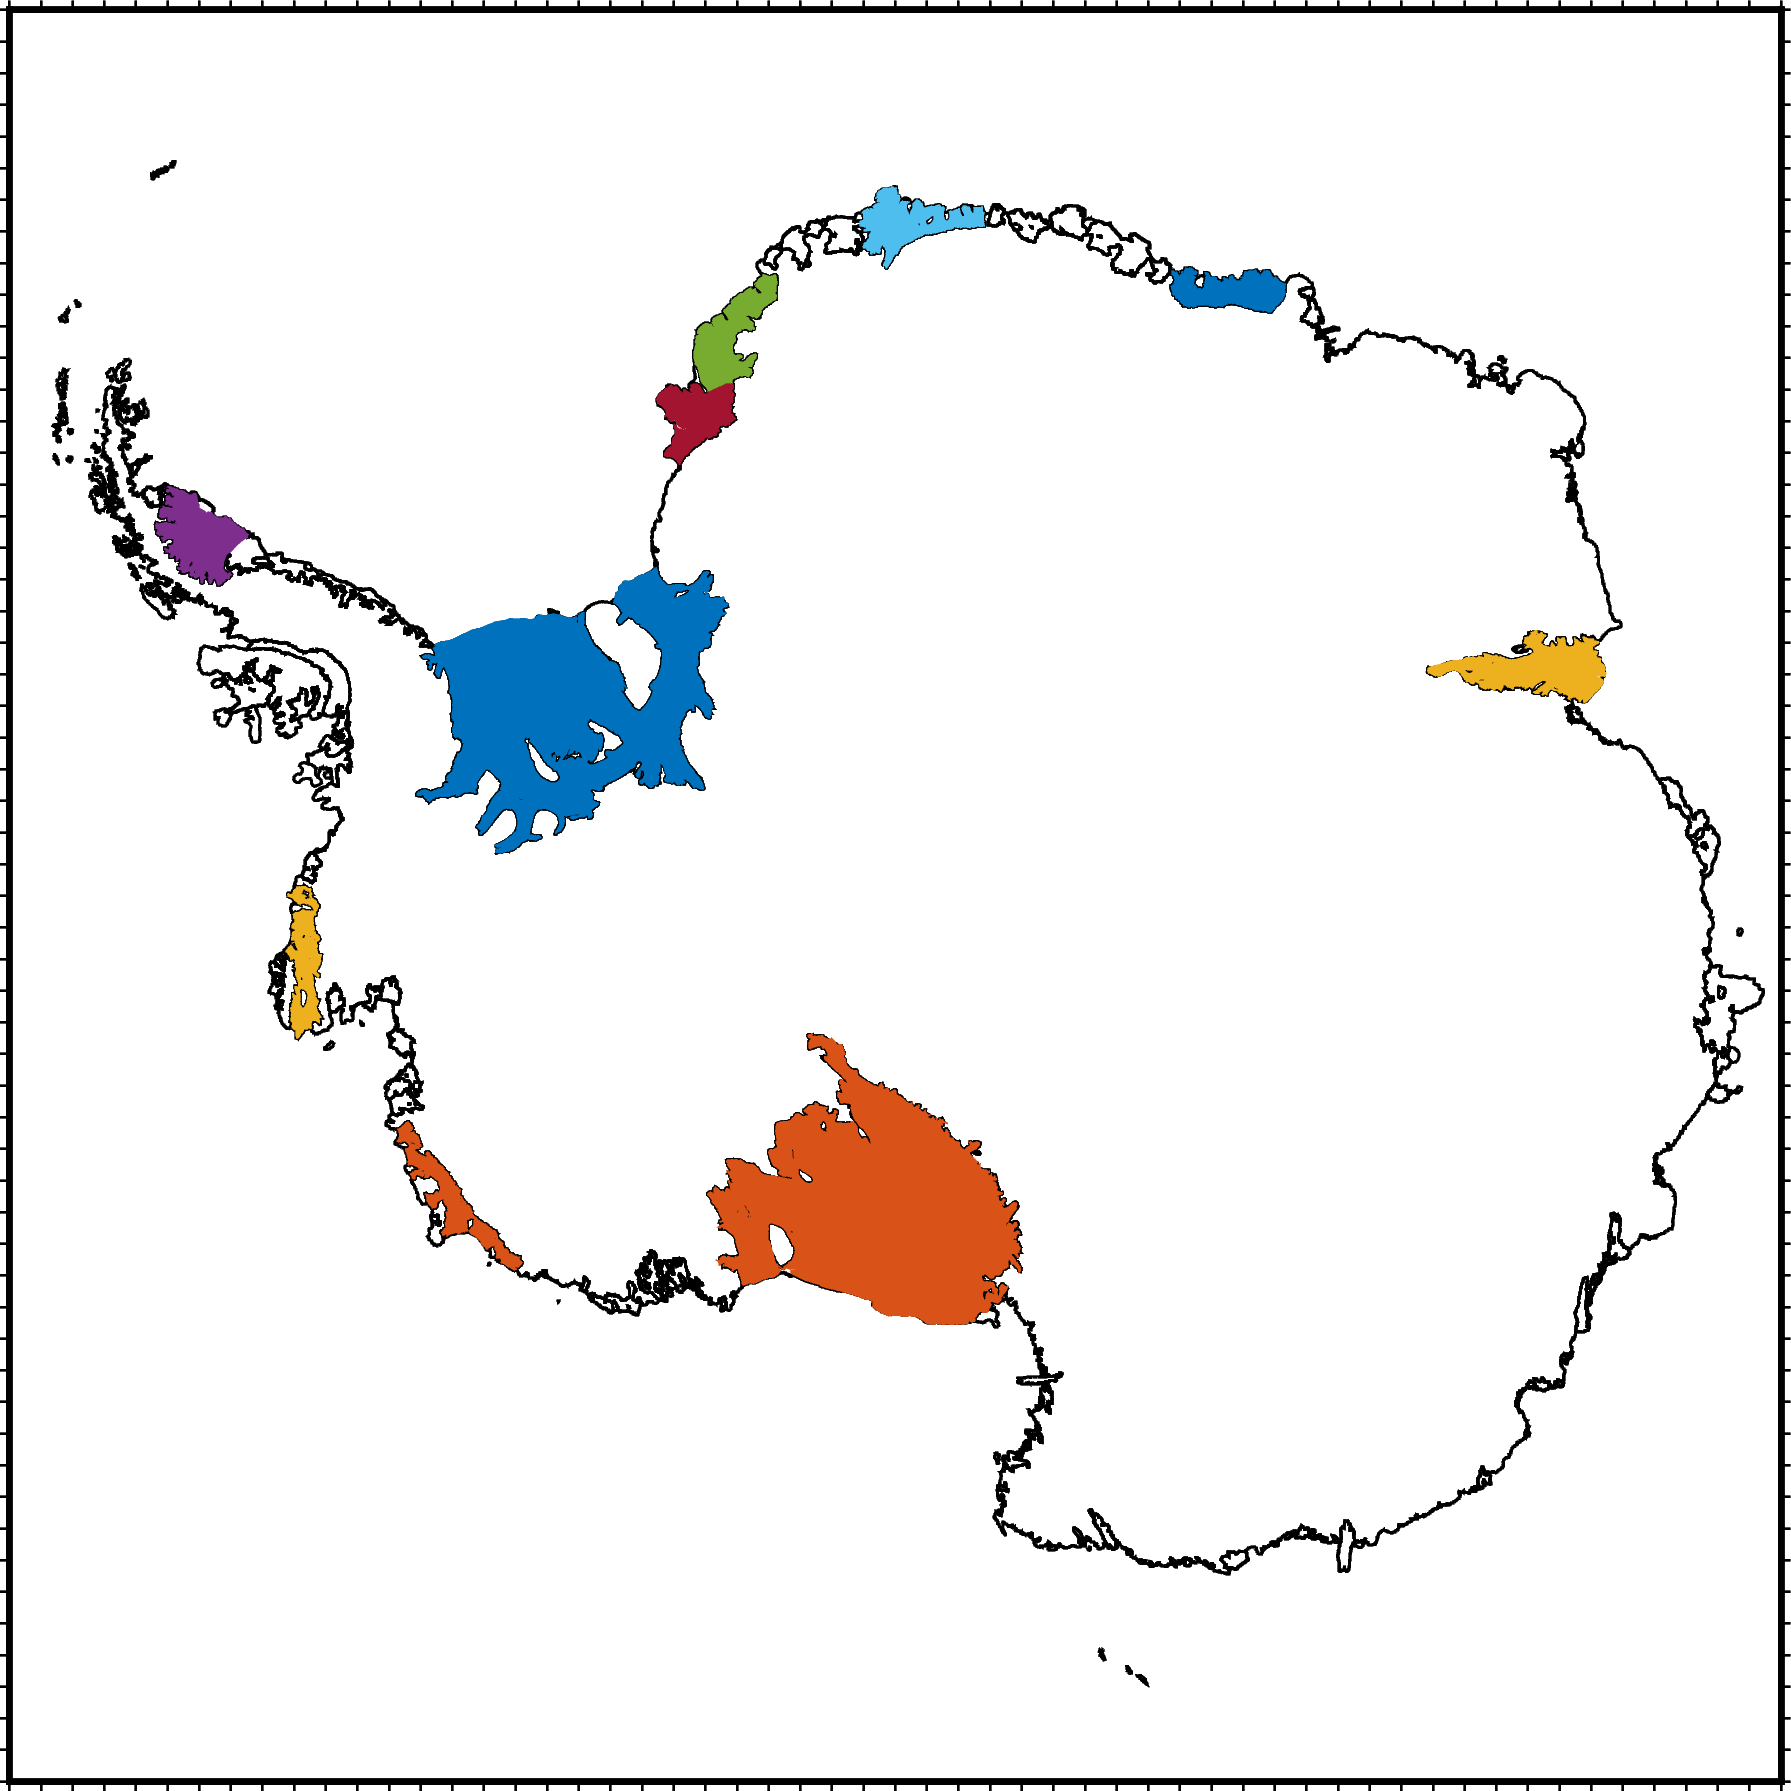

In [8]:
# choose how many ice shelves to plot
df = ice_shelves.iloc[0:10]

# plot basemap with coastline and grounding lines
fig = maps.basemap(
    region=regions.antarctica,
    coast=True,
)

pygmt.makecpt(
    cmap='thermal', 
    series=[df.area.min(), df.area.max()], 
    background='i',
    log=True,
    )

# plot ice shelves and names
fig.plot(
        df,
        close=True,
        fill="auto",
        # label=df.NAME,
    )

fig.show()